In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2


In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('code/')


In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook


In [4]:
# Import code modules:
from structures import RingRoad
from animations import Animation


In [5]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


<IPython.core.display.Javascript object>


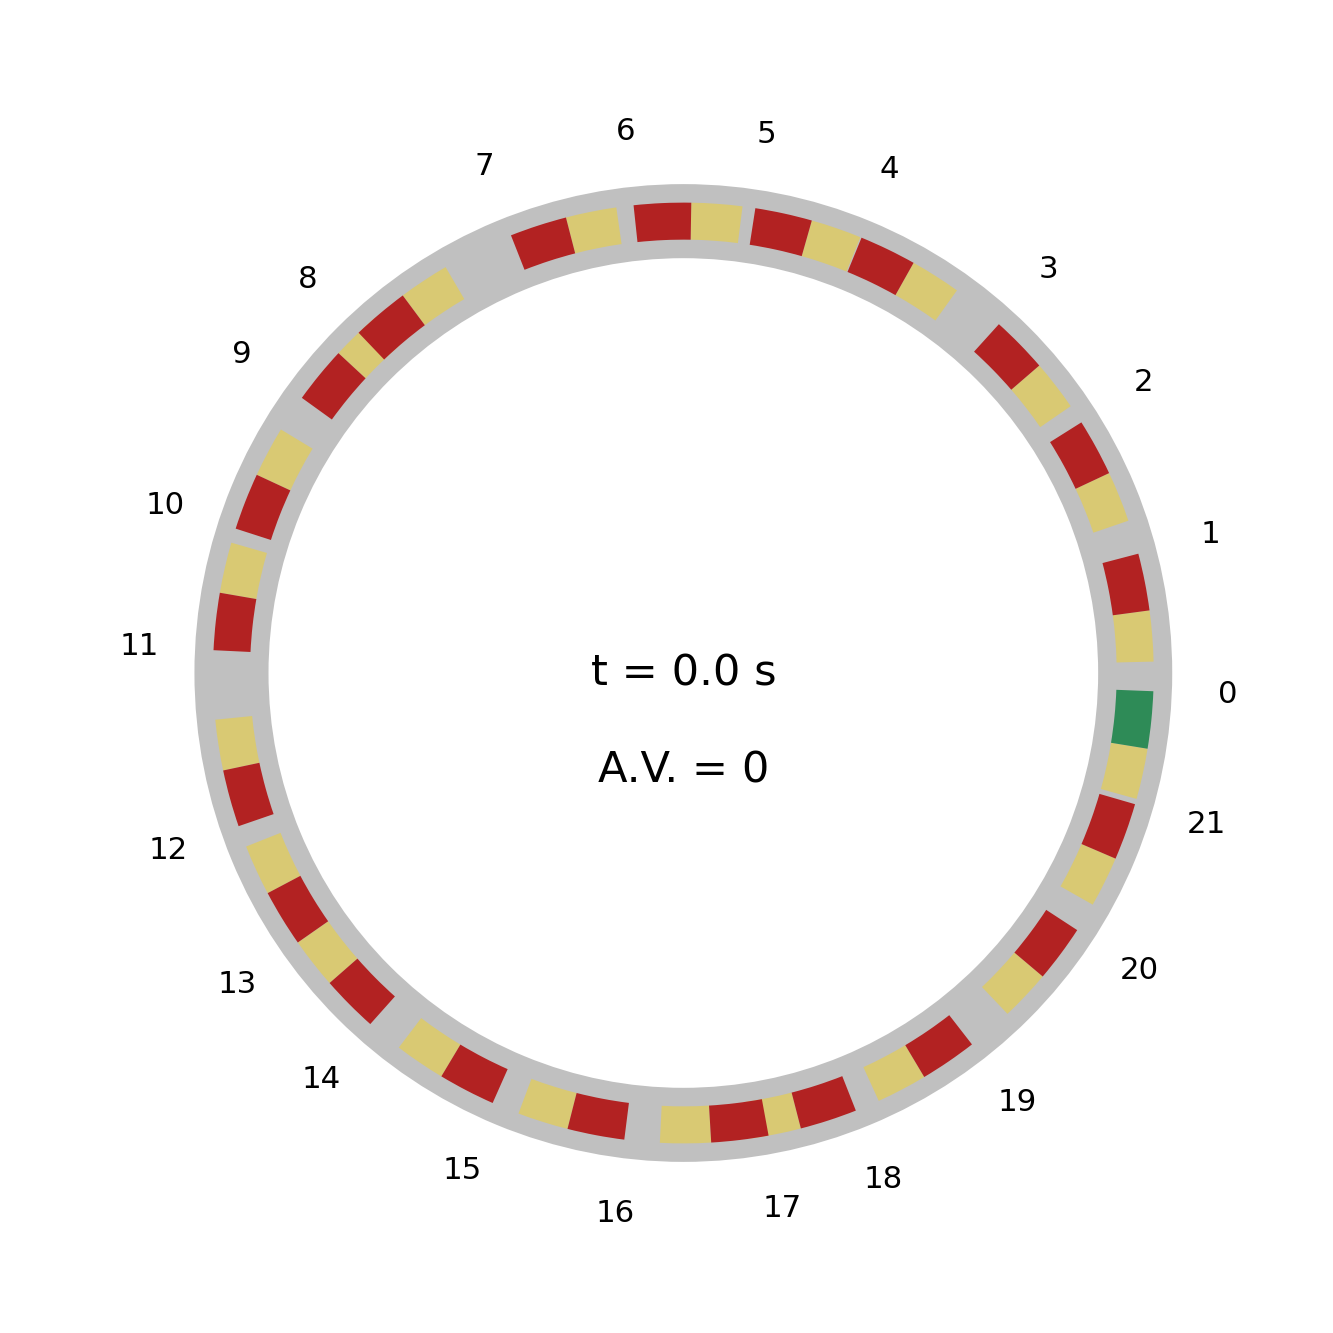

In [6]:
# Define a ring road environment:
env = RingRoad(
    num_vehicles = 22,  # The vechicles at index 0 is an A.V.
    ring_length = 230.0,  # The road is a cicle.
    starting_noise = 4.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.3,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
)

# Plot initial conditions:
fig,ax = env.plot_ring(step=0, draw_cars_to_scale=True, draw_safety_buffer=True)


In [7]:
# Run the simulation for set number of time steps:
total_time = 90  # In seconds.
total_steps = int(np.ceil(total_time/env.dt))
env.run(steps=total_steps)


<IPython.core.display.Javascript object>


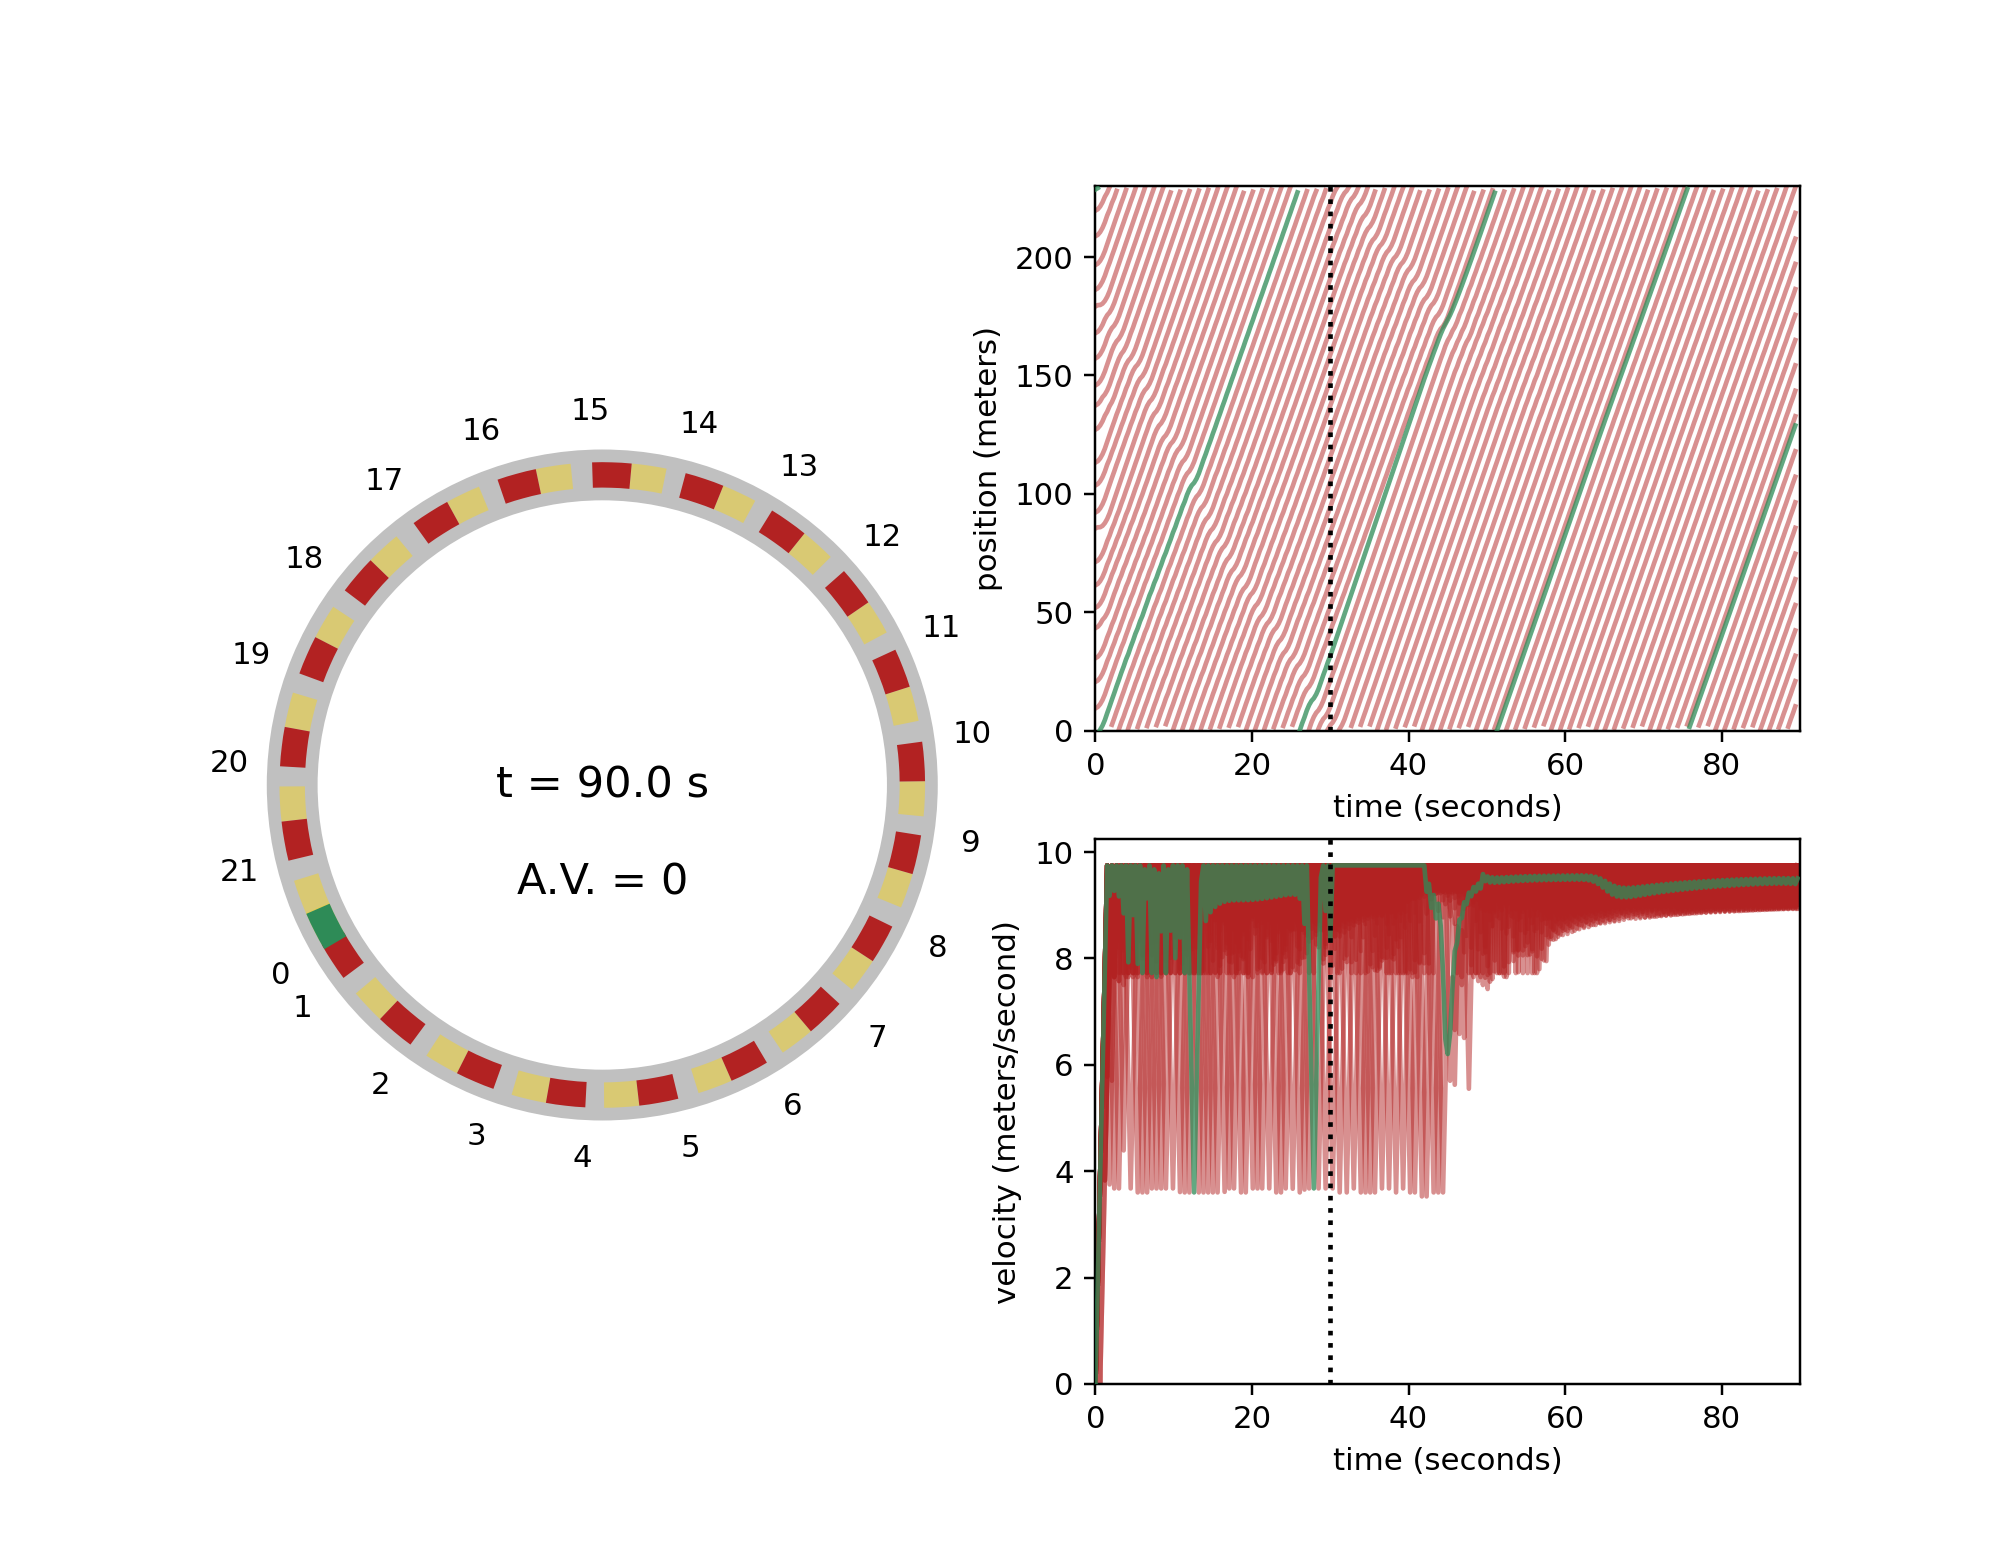

In [8]:
# Show step of simulation:
step = env.step
fig, axs = env.plot_dashboard(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)


In [9]:
# Calculate performance stats:
steps_before = range(0,env.av_activate)
steps_after = range(env.av_activate, env.step)
speeds_before = env.get_vehicle_vel_table(steps_before)
speeds_after = env.get_vehicle_vel_table(steps_after)
print("Mean standard deviation before: {}".format(speeds_before.std(axis=0).mean()))
print("Mean standard deviation after: {}".format(speeds_after.std(axis=0).mean()))
df_before = pd.DataFrame(speeds_before.std(axis=0).to_frame(name='before AV control'))
df_after = pd.DataFrame(speeds_after.std(axis=0).to_frame(name='after AV control'))
pd.concat([df_before,df_after],axis=1)


Mean standard deviation before: 2.565508522966022
Mean standard deviation after: 0.8811879914678631


,before AV control,after AV control
vehicle_id,,
0,2.395542,0.845037
1,2.387025,0.954764
2,2.360733,0.957114
3,2.370728,0.963142
4,2.506605,0.957325
5,2.389310,0.934309
6,2.556652,0.839839
7,2.570741,0.842286
8,3.185926,0.837023


<IPython.core.display.Javascript object>


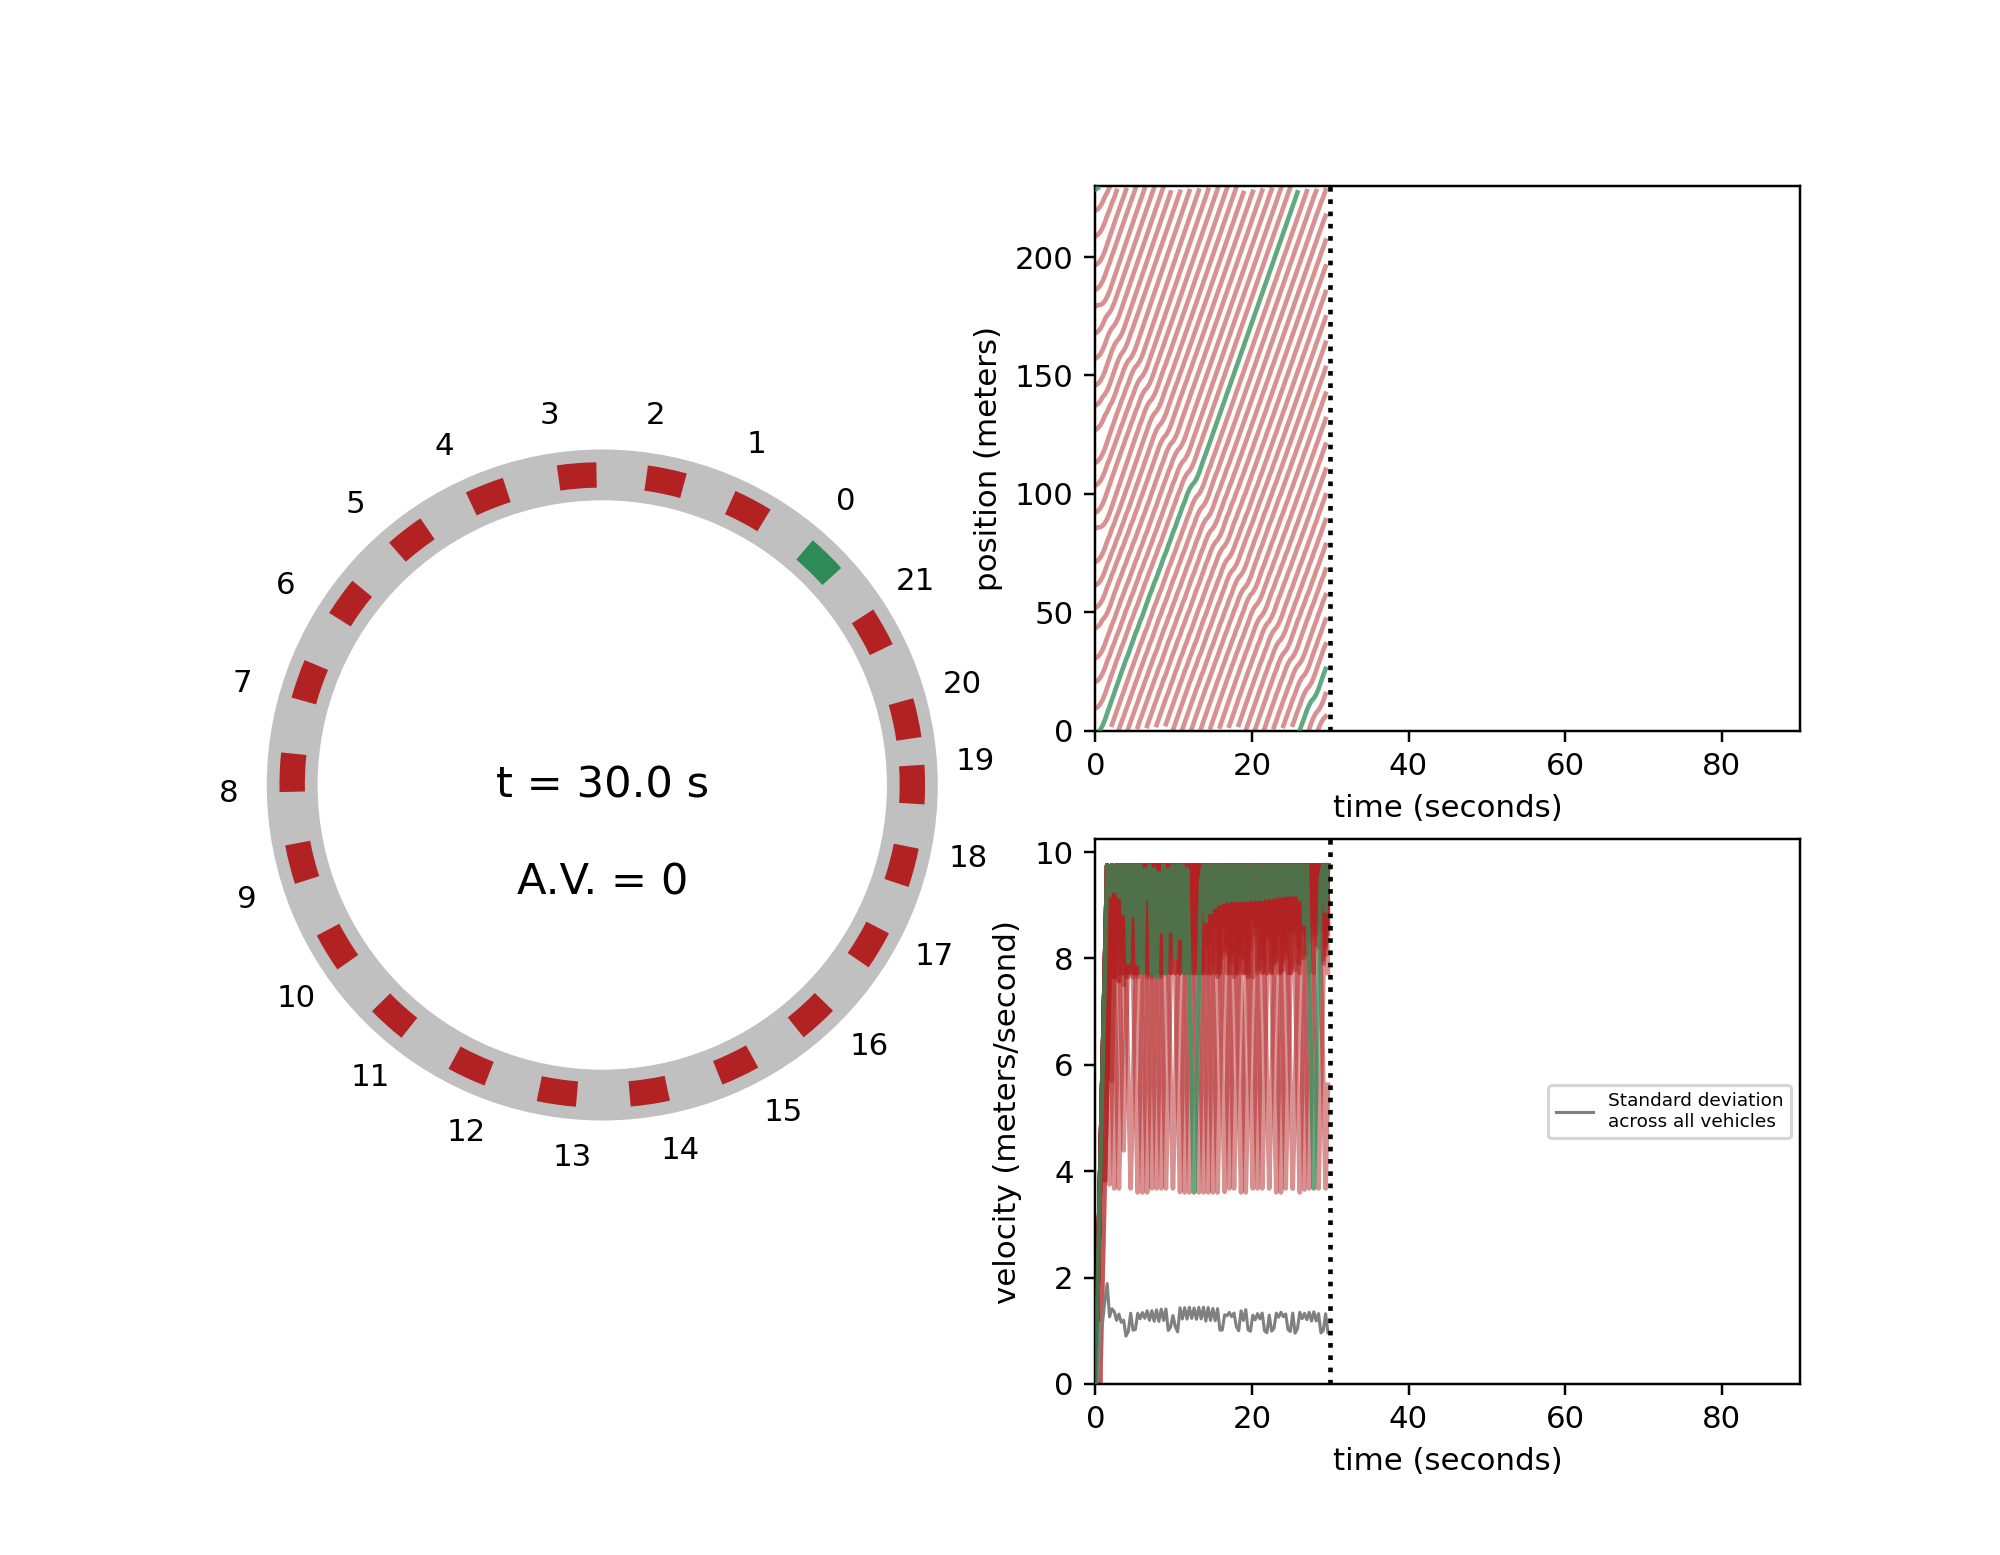

In [10]:
# Build animation:
anim = Animation(env, speedup=5.0, interval=5)
anim.animate_dashboard(draw_cars_to_scale=True, draw_safety_buffer=False, show_sigma=True)

# Show animation:
anim.show()


In [11]:
# Save animation as GIF (may take a few minutes -- pauses preview above):
anim.save_gif(filepath="outputs/baseline.gif", overwrite=True)


Saved : outputs/baseline.gif .


In [12]:
# Deactivate interactive plotting mode (ends preview above):
# anim.stop()
